
# **Apartment Price Prediction in Bogotá**

**1.Introduction**
The real estate market in Bogotá is a complex and dynamic sector, where multiple factors influence property values. This project aims to develop a Machine Learning model to predict the sale price of apartments in the city based on a variety of structural, geographical, and socioeconomic characteristics. Through data exploration and analysis, the goal is to identify patterns that help accurately estimate property values, providing a useful tool for buyers, sellers, and real estate agents.

**2.Data Source**
For the construction of the model, data was collected through web scraping from Metrocuadrado, one of the main real estate information platforms in Colombia. The obtained dataset contains detailed information about each property, including its location (latitude and longitude), area in square meters, number of bedrooms and bathrooms, property age, socioeconomic stratum, sale and rental prices, administration costs, among others. The richness and variety of these variables allow for an in-depth analysis of different factors affecting apartment prices in the city.

**3.Relevant Variables for Prediction**
To ensure the model's accuracy, the following key variables have been selected, as they show a strong correlation with apartment sale prices:

**Key Factors:**

Area (m²): There is generally a direct relationship between apartment size and its sale price. Larger areas tend to have higher values.

**Location (Latitude, Longitude, Sector)**: Location is one of the most decisive factors in property prices. Apartments in high-demand areas tend to have significantly higher costs.

**Socioeconomic Stratum:** Defines the socioeconomic profile of the area and affects the cost of living, influencing property values.

**Number of Bedrooms and Bathrooms:** The number of functional spaces within the apartment impacts its comfort and, therefore, its market value.

**Parking Spaces:** Apartments with parking are usually more valued, especially in areas with high traffic congestion.
Property Age: Newer apartments tend to have higher prices due to their condition and modernity.

**Administration Costs:** A high administration fee may reflect the presence of additional amenities and services in the building, influencing the price.

**Property Condition (Used/New):** New apartments tend to have higher costs compared to used ones due to their lower wear and greater appeal.

**4.Methodological Approach**
To carry out this project, a structured workflow has been followed in different stages, ensuring data cleaning, transformation, and analysis for the
construction of the predictive model:

**Data Preprocessing:** A thorough cleaning of the dataset is performed, removing outliers, handling missing data, and transforming categorical variables into numerical ones for processing.

**Exploratory Data Analysis (EDA):** Visualization and statistical analysis techniques are employed to identify data patterns, correlations between variables, and possible anomalies.

**Feature Engineering:** New variables that can enhance the model's predictive capability are selected and created, such as converting property age data and categorizing prices into ranges.

**Model Training:** Different regression algorithms, such as Linear Regression, Random Forest, and Gradient Boosting, are tested to determine which provides the best price prediction performance.

**Model Evaluation:** Metrics such as Root Mean Squared Error (RMSE) and the Coefficient of Determination (R²) are used to measure the model’s accuracy and its ability to generalize to new data.

**Implementation and Testing:** Once the model is validated, tests are conducted with real data to assess its effectiveness in real-world scenarios.

**5.References**
For the development of this project, various repositories and sources related to real estate price prediction were
consulted, including:

**Builker-col/bogota-apartments:** Code repository and data analysis on Bogotá’s real estate market.

**Kaggle - House Price Prediction:** Similar projects predicting real estate prices in other cities and countries.

This project aims to offer a price estimation model that can be useful for those looking to buy or sell apartments in Bogotá, optimizing decision-making in the real estate sector through Machine Learning techniques.

# ***1. Importing Libraries and Loading Data***



📌 Import Libraries

Objective: Load the necessary tools for data cleaning, analysis, visualization, and modeling in the apartment price prediction project.

This code block imports essential libraries to manipulate data (pandas, numpy), visualize it (seaborn, matplotlib), process it (sklearn.preprocessing), handle missing values (KNNImputer), apply machine learning models based on k-Nearest Neighbors (KNeighborsRegressor, KNeighborsClassifier), and evaluate model performance (sklearn.metrics).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neural_network import MLPRegressor

📌 Loading the dataset: Read the CSV file containing apartment information and store it in a Pandas DataFrame.

In [ ]:
ds_aptos = pd.read_csv('../data/builker_raw_data.csv')
ds_aptos

FileNotFoundError: [Errno 2] No such file or directory: '../data/builker_raw_data.csv'

📌 Definition of area ranges to classify properties
Area ranges in square meters (m²) are established to categorize properties into specific groups. This allows analyzing the distribution of apartments based on their size and facilitates comparison between different real estate categories.

,count
area_range,
50-100,28302
150-300,15347
100-150,12669
0-50,8863
300-600,3644
600-1000,91
1000+,50


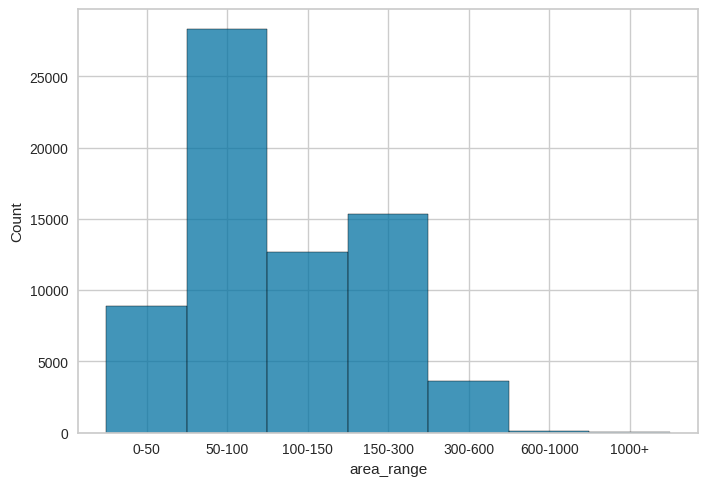

In [ ]:
# Properties grouped by area ranges
area_ranges = [0, 50, 100, 150, 300, 600, 1000,50000]
area_labels = ["0-50", "50-100", "100-150", "150-300", "300-600", "600-1000", "1000+"]
area_ranges_df = ds_aptos.copy()
area_ranges_df['area_range'] = pd.cut(ds_aptos['area'], bins=area_ranges, labels=area_labels, right=False)
sns.histplot(data = area_ranges_df, x = "area_range")
# Count instances per area range
area_ranges_df['area_range'].value_counts()

# **2. Data Cleaning and Preprocessing**

📌 Exploring the data structure: Obtain a general summary of the dataset to analyze its size, data types, and missing values.

In [ ]:
print(ds_aptos.shape) # Revisar forma de los datos (ej. rows & columns)
print(ds_aptos.info())

(68973, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68973 entries, 0 to 68972
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          68973 non-null  object 
 1   tipo_propiedad  68973 non-null  object 
 2   tipo_operacion  68973 non-null  object 
 3   precio_venta    48138 non-null  float64
 4   area            68971 non-null  float64
 5   habitaciones    68965 non-null  float64
 6   banos           68967 non-null  float64
 7   administracion  58679 non-null  object 
 8   parqueaderos    68965 non-null  float64
 9   sector          63998 non-null  object 
 10  estrato         68953 non-null  float64
 11  antiguedad      68945 non-null  object 
 12  estado          67692 non-null  object 
 13  longitud        68164 non-null  object 
 14  latitud         68164 non-null  object 
 15  datetime        68973 non-null  object 
dtypes: float64(6), object(10)
memory usage: 8.4+ MB
None


There are 68,973 records and 16 columns. Some columns have missing values (e.g., precio_venta, administracion, sector, longitud, latitud). The dataset contains a mix of data types: float64 (numerical), object (text strings), and datetime (dates).

📌 Statistical summary of the data: Obtain descriptive statistics of the numerical variables in the dataset.


In [ ]:
#Statistical Data
ds_aptos.describe().T

,count,mean,std,min,25%,50%,75%,max
precio_venta,48138.0,1.509352e+09,3.697549e+10,245000.0,365000000.0,600000000.0,1.150000e+09,4.250000e+12
area,68971.0,1.351401e+02,9.065257e+02,0.0,61.0,92.0,1.590000e+02,1.420000e+05
habitaciones,68965.0,2.587602e+00,8.490058e-01,1.0,2.0,3.0,3.000000e+00,8.000000e+00
banos,68967.0,2.610234e+00,1.158731e+00,-3.0,2.0,2.0,3.000000e+00,5.000000e+00
parqueaderos,68965.0,1.572203e+00,1.048859e+00,0.0,1.0,2.0,2.000000e+00,4.000000e+00
estrato,68953.0,4.740954e+00,1.262316e+00,0.0,4.0,5.0,6.000000e+00,7.000000e+00


Key Findings:

precio_venta:
The mean is 1.5 billion, but the standard deviation is extremely high (3.7x10¹⁰), suggesting outliers.
The maximum value (4.25 trillion) appears to be an anomaly.

area:
The average is 135 m², but there is a minimum value of 0 m², indicating possible data errors.
The maximum (142,000 m²) is unusually large and should be verified.

habitaciones:
Most apartments have 2 or 3 bedrooms.
The maximum is 8 bedrooms.

baños:
There is a minimum value of -3, suggesting incorrect data that needs cleaning.

parqueaderos:
Most apartments have between 1 and 2 parking spaces, which is consistent with market offerings.

estrato:
The average is 4.74, with a range from 0 to 7.
A stratum of 0 could be incorrect, as strata typically range from 1 to 6.

📌 Identification of missing values: Detect the number of missing values in each column of the dataset.

In [ ]:
#Identify if there are missing values and duplicates.
nulos = ds_aptos.isnull().sum()
print(nulos)

codigo                0
tipo_propiedad        0
tipo_operacion        0
precio_venta      20835
area                  2
habitaciones          8
banos                 6
administracion    10294
parqueaderos          8
sector             4975
estrato              20
antiguedad           28
estado             1281
longitud            809
latitud             809
datetime              0
dtype: int64


Key Findings:

precio_venta → 🚨 20,835 missing values (~30% of the data).
This is a key variable for prediction, so it is necessary to decide whether to impute values or remove records.

administracion → ❗ 10,294 missing values.
It should be analyzed whether these missing values can be estimated using other related variables.

sector → ❗ 4,975 missing values.
This may be important for location analysis and price segmentation.

longitud y latitud → ❗ 809 missing values.
This may affect geospatial analysis. These values can be removed or imputed if possible.

estado → ⚠️ 1,281 missing values.
Check if these can be completed with similar data or marked as "unknown."

Other variables (area, habitaciones, baños, parqueaderos, estrato, antigüedad) have few missing values (<50), so they can be handled through imputation or removal of specific records.

📌 Detection of duplicate records: Identify if there are repeated codes in the "codigo" column, which could indicate duplicate records in the dataset.

In [ ]:
# Check for duplicates in the "codigo" column
duplicados = ds_aptos["codigo"].duplicated(keep=False)  # Muestra todos los duplicados
print(duplicados)

0        False
1        False
2        False
3        False
4        False
         ...  
68968    False
68969    False
68970    False
68971    False
68972    False
Name: codigo, Length: 68973, dtype: bool


📌 Filtering and visualization of duplicate values: Extract and display records with duplicate codes to assess their impact on the dataset.

In [ ]:
# Filter and display duplicate values
df_duplicados = ds_aptos[duplicados]

# Print the duplicates found
if not df_duplicados.empty:
    print("Valores duplicados encontrados:")
    print(df_duplicados)
else:
    print("No hay valores duplicados en la columna 'codigo'.")

No hay valores duplicados en la columna 'codigo'.


📌 Filter data by removing rental records: Remove records where tipo_operacion is "ARRIENDO," as the model is designed to analyze sale prices and not rental prices.

In [ ]:
# Explanation: This block of code describes its function.
# Remove rentals from tipo_operacion because they are not relevant to the model

print(ds_aptos['tipo_operacion'].unique())
print(ds_aptos['tipo_operacion'].value_counts().isnull())
# Delete rows where 'codigo' is 'ARRIENDO'
df_filtrado = ds_aptos[ds_aptos["tipo_operacion"] != "ARRIENDO"]
print(df_filtrado['tipo_operacion'].unique())
print(df_filtrado.isnull().sum())

['VENTA Y ARRIENDO' 'VENTA' 'ARRIENDO']
tipo_operacion
VENTA               False
ARRIENDO            False
VENTA Y ARRIENDO    False
Name: count, dtype: bool
['VENTA Y ARRIENDO' 'VENTA']
codigo               0
tipo_propiedad       0
tipo_operacion       0
precio_venta         0
area                 1
habitaciones         2
banos                2
administracion    4026
parqueaderos         4
sector            3306
estrato             17
antiguedad          25
estado            1281
longitud           718
latitud            718
datetime             0
dtype: int64


📌 Remove irrelevant features

Delete the columns "codigo", "estado", "tipo_propiedad", "tipo_operacion", and "datetime" from the DataFrame because they do not provide useful information for data analysis and modeling.

These columns are removed because:

codigo: It is a unique identifier assigned by the system and has no relation to the characteristics of the apartments, so it does not add value to the model.
estado: All records fall under the "USADO" category or have missing values, meaning it does not provide useful information for the analysis.
tipo_operacion: The data has already been filtered to retain only properties for sale, making this column redundant.
datetime: Represents the date and time of the record but will not be used in the prediction model, so it is discarded.
tipo_propiedad: There is only one type of property in the dataset, so it does not add value to the information.

In [ ]:
col_del = ["codigo", "estado", "tipo_operacion", "datetime", "tipo_propiedad"]
df_filtrado.drop(col_del, axis=1, inplace=True)
print(df_filtrado.columns)
print(df_filtrado.isnull().sum())

Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'longitud',
       'latitud'],
      dtype='object')
precio_venta         0
area                 1
habitaciones         2
banos                2
administracion    4026
parqueaderos         4
sector            3306
estrato             17
antiguedad          25
longitud           718
latitud            718
dtype: int64


<ipython-input-251-ff90f00f2638>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado.drop(col_del, axis=1, inplace=True)


In [ ]:
print(df_filtrado.columns)

Index(['precio_venta', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'longitud',
       'latitud'],
      dtype='object')


📌 Validation of missing values in the "estrato" column

Identify and analyze records where the variable "estrato" has missing values or is equal to zero, as these could indicate missing data or errors in the information.

In [ ]:
missing_data = df_filtrado[df_filtrado["estrato"].isna()]
missing_data

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,longitud,latitud
19296,1.700000e+09,186.0,3.0,4.0,1320000,3.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.04772,4.6593714
19430,9.500000e+08,171.0,3.0,3.0,700000,1.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.089386,4.606289
19461,2.400000e+09,295.0,3.0,3.0,1250000,3.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.0778,4.5809317
19641,6.600000e+08,108.0,3.0,2.0,267000,2.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.0607,4.72281
19768,2.600000e+09,320.0,4.0,5.0,2248200,4.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.03002,4.6931415
23266,1.800000e+09,183.0,2.0,3.0,1200000,1.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.047295,4.662811
27823,1.450000e+09,0.0,3.0,4.0,1800000,3.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.0485,4.6740546
28740,2.200000e+09,288.0,3.0,3.0,1100000,4.0,OTROS,NaN,ENTRE 10 Y 20 ANOS,-74.079185,4.723232
29226,3.800000e+09,326.0,3.0,4.0,2800000,0.0,OTROS,NaN,ENTRE 0 Y 5 ANOS,-74.05096,4.6574187
30982,1.988000e+12,184.0,3.0,4.0,NaN,4.0,OTROS,NaN,ENTRE 5 Y 10 ANOS,-74.188675,4.616134


### What does the table show us?
There are several properties with a missing "estrato," which could be an error in data collection.
Many of these properties are in the "OTROS" sector, which may indicate that the "estrato" information was not correctly recorded in these cases.
There are also missing values in the "administración" column, which may suggest that some missing data are related.

📌 Clean, transform, and improve the quality of the dataset before analysis or modeling.


In [ ]:
def validar_coordenadas(df):
    # Convert latitude and longitude to float
    df['longitud'] = pd.to_numeric(df['longitud'], errors='coerce')
    df['latitud'] = pd.to_numeric(df['latitud'], errors='coerce')
    # Filter coordinates within Bogotá
    registros_fuera_bogota = df[~(df['latitud'].between(4.5, 4.85)) | ~(df['longitud'].between(-74.2, -73.9))]
    df = df[(df['latitud'].between(4.5, 4.85)) & (df['longitud'].between(-74.2, -73.9))]
    return df, registros_fuera_bogota

def imputar_sector(df):
    sectores_conocidos = df.dropna(subset=['sector'])
    sectores_desconocidos = df[df['sector'].isnull()]

    if not sectores_desconocidos.empty:
        knn = NearestNeighbors(n_neighbors=5, metric='euclidean')
        knn.fit(sectores_conocidos[['longitud', 'latitud']])

        distancias, indices = knn.kneighbors(sectores_desconocidos[['longitud', 'latitud']])

        sectores_imputados = []
        for idx, vecinos in enumerate(indices):
            sectores_vecinos = sectores_conocidos.iloc[vecinos]['sector'].mode()
            sectores_imputados.append(sectores_vecinos[0] if not sectores_vecinos.empty else np.nan)

        df.loc[df['sector'].isnull(), 'sector'] = sectores_imputados

    return df

#Dataset cleaning
df = df_filtrado.copy()

registros_eliminados = pd.DataFrame()

# Validate coordinates before imputing sector
df, registros_fuera_bogota = validar_coordenadas(df)
registros_eliminados = pd.concat([registros_eliminados, registros_fuera_bogota])

# Impute sector before deleting records without a sector
df = imputar_sector(df)

# Delete remaining records without a sector
registros_eliminados = pd.concat([registros_eliminados, df[df['sector'].isnull()]])
df = df.dropna(subset=['sector'])

# Convert administration to numeric
df['administracion'] = pd.to_numeric(df['administracion'], errors='coerce')

# Fill missing values in key columns with the sector median
cols_to_impute = ['area', 'habitaciones', 'banos', 'parqueaderos', 'estrato']
for col in cols_to_impute:
    df[col] = df.groupby('sector')[col].transform(lambda x: x.fillna(x.median()))

# Fill administration with the median of the socioeconomic stratum
df['administracion'] = df.groupby('estrato')['administracion'].transform(lambda x: x.fillna(x.median()))

# Correct stratum 7 to 6
df['estrato'] = df['estrato'].replace(7, 6)

# Impute stratum 0 based on sector and sale price
df.loc[df['estrato'] == 0, 'estrato'] = df.groupby('sector')['estrato'].transform(lambda x: x.median())

# Impute missing values in 'antigüedad' using the mode of the sector
df['antiguedad'] = df.groupby('sector')['antiguedad'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# If there are still missing values, use KNN to impute them
if df['antiguedad'].isnull().sum() > 0:
    knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
    df['antiguedad'] = knn_imputer.fit_transform(df[['precio_venta', 'longitud', 'latitud']])

df.info()
df[df.select_dtypes(include= "object").columns] = df.select_dtypes(include= "object").apply(lambda x: x.astype("category"))


<class 'pandas.core.frame.DataFrame'>
Index: 46003 entries, 0 to 68972
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   precio_venta    46003 non-null  float64
 1   area            46003 non-null  float64
 2   habitaciones    46003 non-null  float64
 3   banos           46003 non-null  float64
 4   administracion  46003 non-null  float64
 5   parqueaderos    46003 non-null  float64
 6   sector          46003 non-null  object 
 7   estrato         46003 non-null  float64
 8   antiguedad      46003 non-null  object 
 9   longitud        46003 non-null  float64
 10  latitud         46003 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.2+ MB


1️⃣ Validation and filtering of coordinates 🌍
✔ Coordinate conversion: The latitude and longitude columns are converted to numerical values to avoid errors.
✔ Geographic filtering:
Only properties located in Bogotá are retained (latitude between 4.5 and 4.85, longitude between -74.2 and -73.9).
Records outside Bogotá are stored in registros_fuera_bogota for further analysis.
📌 Why is this important?
👉 Ensures that only properties within the target area are analyzed, preventing errors from incorrectly recorded data.

2️⃣ Sector imputation with KNN 🏘
✔ Separation of records:

Properties with a known sector → Used as a reference.
Properties without a sector → Imputed using K-Nearest Neighbors (KNN) based on location (latitude, longitude).
✔ Imputation process:
The 5 closest properties are identified.
The most frequent sector among them (mode) is assigned.
📌 Why use KNN?
👉 It allows for accurately estimating the sector without removing valuable data.
3️⃣ Elimination of records without a sector 🗑
✔ After imputation, if there are still properties without a sector, they are removed.
✔ These records are stored in registros_eliminados for traceability.
📌 Why?
👉 Without the sector, other key variables like estrato, area, or price cannot be properly completed.

4️⃣ Transformations and corrections 🔧
✔ Conversion of administracion to numeric to facilitate calculations.
✔ Imputation of missing values with the sector median for:

Area
Bedrooms
Bathrooms
Parking spaces
Socioeconomic stratum
✔ Imputation of administracion using the median of estrato (since administrative costs depend on the socioeconomic level).
✔ Corrections in the estrato variable:
Estrato 7 → Changed to Estrato 6 (since Bogotá's strata range from 1 to 6).
Estrato 0 → Replaced with the sector median.
📌 Why use the median?
👉 The median is less sensitive to extreme values, ensuring data stability.
5️⃣ Imputation and transformation of antigüedad 🏗
✔ Step 1: The mode of the sector is assigned to missing values.
✔ Step 2: If there are still missing values, KNN Imputer is used with price and location data.
📌 Why this strategy?
👉 Ensures that all properties have a realistic age value using a hierarchical approach.

6️⃣ Dataset optimization 📊
✔ Categorical variables are converted to category type to improve efficiency in storage and processing.
✔ A dataset summary is generated with df.info() to verify data cleanliness.

🎯 Final Result ✅
🚀 Optimized and clean dataset with no extreme outliers.
🔍 Missing data imputed using statistical and location-based techniques.
📊 Ready for exploratory analysis and Machine Learning models.

In [ ]:
df['antiguedad'].unique()

['MAS DE 20 ANOS', 'ENTRE 5 Y 10 ANOS', 'ENTRE 0 Y 5 ANOS', 'ENTRE 10 Y 20 ANOS', 'REMODELADO']
Categories (5, object): ['ENTRE 0 Y 5 ANOS', 'ENTRE 10 Y 20 ANOS', 'ENTRE 5 Y 10 ANOS',
                         'MAS DE 20 ANOS', 'REMODELADO']

In [ ]:
registros_eliminados

,precio_venta,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,longitud,latitud
8,8.450000e+08,150.0,3.0,4.0,760000,2.0,NaN,6.0,REMODELADO,NaN,NaN
89,7.450000e+08,85.0,2.0,3.0,590000,2.0,NaN,6.0,ENTRE 0 Y 5 ANOS,NaN,NaN
105,1.265000e+09,139.0,4.0,5.0,659000,3.0,NaN,5.0,ENTRE 0 Y 5 ANOS,NaN,NaN
128,1.040000e+08,36.0,2.0,1.0,60500,0.0,BOSA SOACHA,2.0,ENTRE 10 Y 20 ANOS,-74.202934,4.627528
196,2.500000e+09,440.0,4.0,5.0,2400000,4.0,CERROS DE SUBA,6.0,MAS DE 20 ANOS,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68821,1.599000e+08,140.0,3.0,2.0,100000.0,1.0,NaN,3.0,REMODELADO,-74.263030,4.731560
68868,4.200000e+08,74.0,2.0,2.0,530000.0,1.0,NaN,6.0,MAS DE 20 ANOS,NaN,NaN
68897,1.400000e+09,126.0,2.0,3.0,806000.0,2.0,NaN,6.0,ENTRE 5 Y 10 ANOS,NaN,NaN
68910,2.499000e+08,48.0,3.0,2.0,10000.0,1.0,NaN,3.0,REMODELADO,NaN,NaN


In [ ]:
df.isnull().sum()

,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,0
parqueaderos,0
sector,0
estrato,0
antiguedad,0
longitud,0


# **3. Exploratory Data Analysis (EDA) and Feature Engineering**

📌 Explore the distribution of sale prices in each socioeconomic stratum, identifying possible outliers and the relationship between area and price.

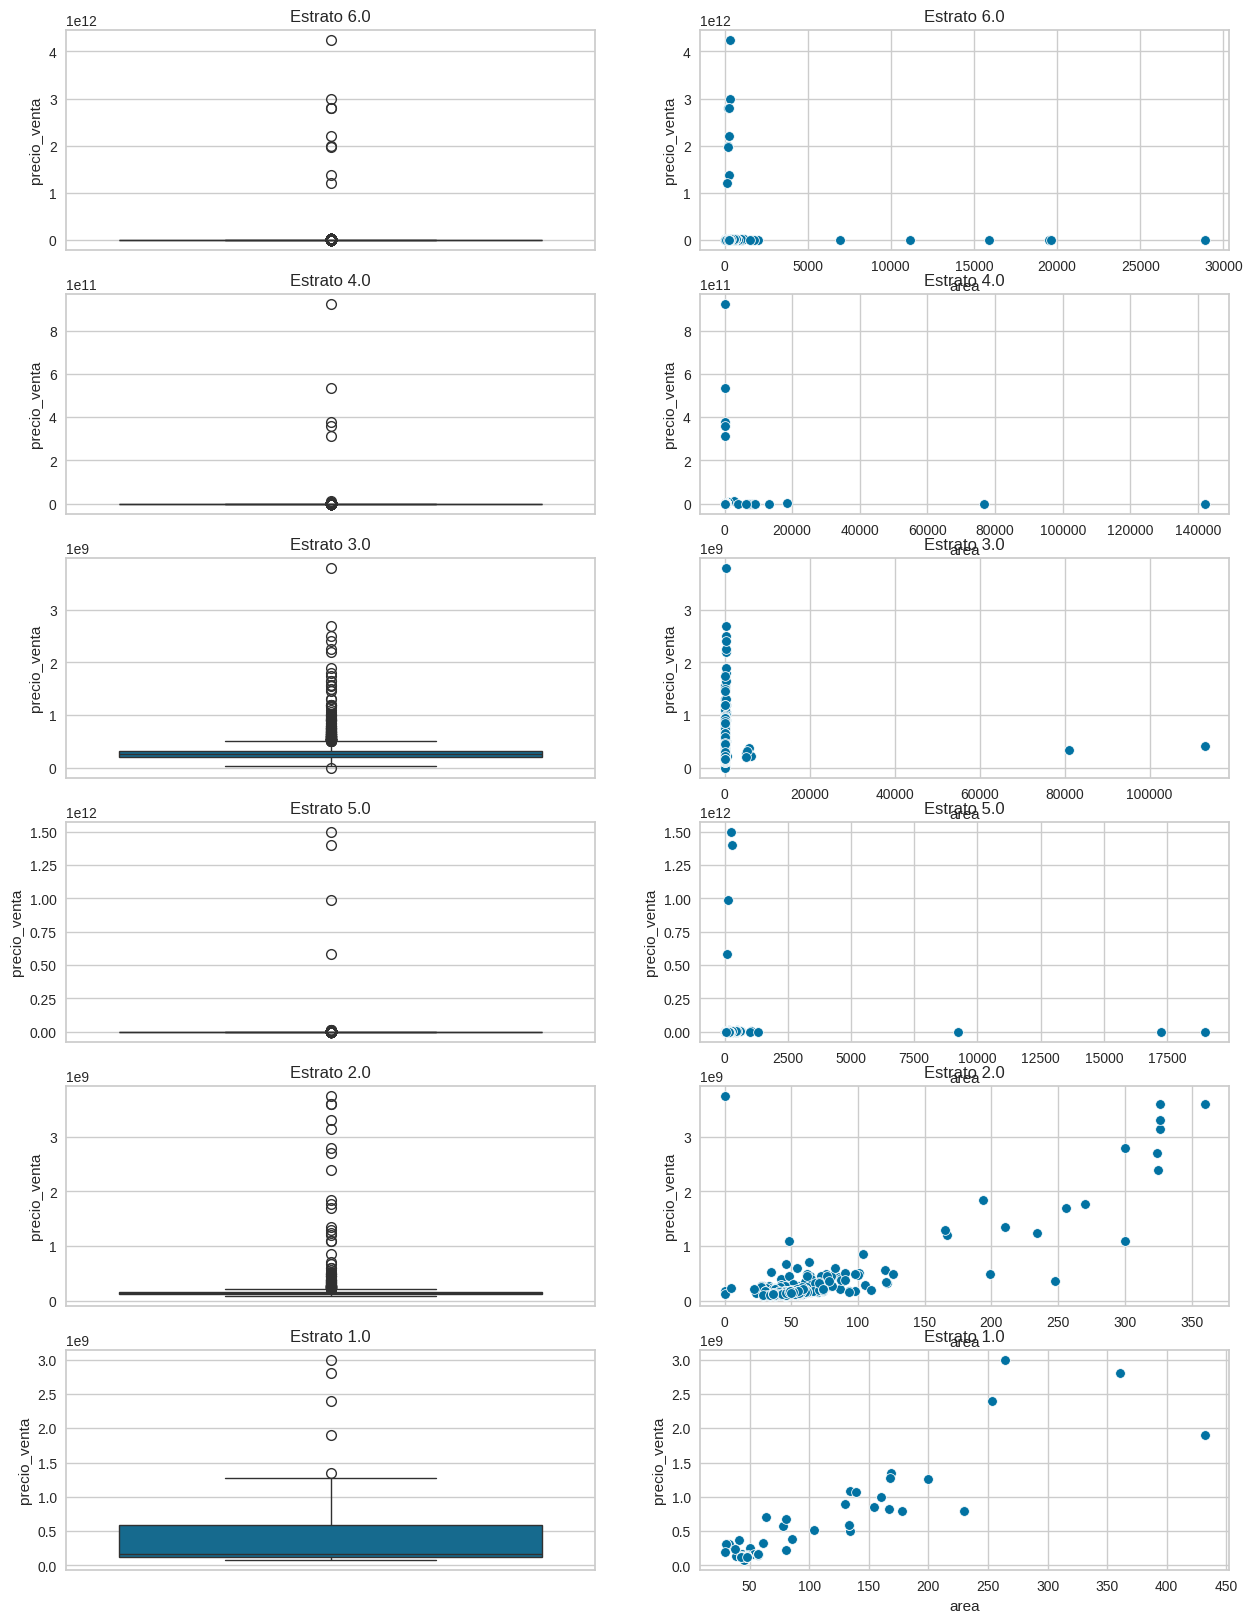

In [ ]:
#A boxplot is generated for each socioeconomic stratum, allowing visualization.
fig, ax = plt.subplots(len(df["estrato"].unique()),2 , figsize=(15, 20))
for i, estrato in enumerate(df["estrato"].unique()):
  estrato_data = df[df["estrato"] == estrato]
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax[i,0])
  ax[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax[i,1])
  ax[i,1].set_title(f"Estrato {estrato}")

📌 Analyze the distribution of properties across different area ranges, identifying how many properties exist in each category.

,count
area_range,
50-100,18662
150-300,11278
100-150,9255
0-50,4179
300-600,2533
600-1000,53
1000+,39


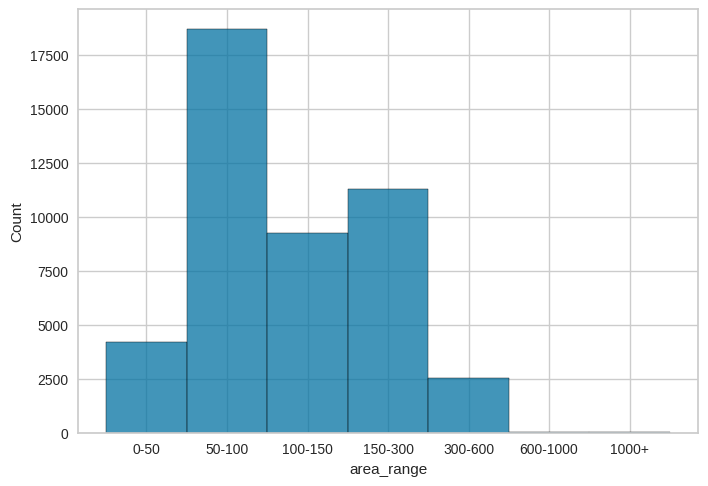

In [ ]:
# Properties grouped by area ranges.
area_ranges = [0, 50, 100, 150, 300, 600, 1000,50000]
area_labels = ["0-50", "50-100", "100-150", "150-300", "300-600", "600-1000", "1000+"]
area_ranges_df = df.copy()
area_ranges_df['area_range'] = pd.cut(df['area'], bins=area_ranges, labels=area_labels, right=False)
sns.histplot(data = area_ranges_df, x = "area_range")
# Count the instances by area ranges.
area_ranges_df['area_range'].value_counts()

📌 A cleaning and filtering process is applied to the property data, removing outliers and generating visualizations that facilitate the interpretation of the relationship between the stratum, area, and sale price.

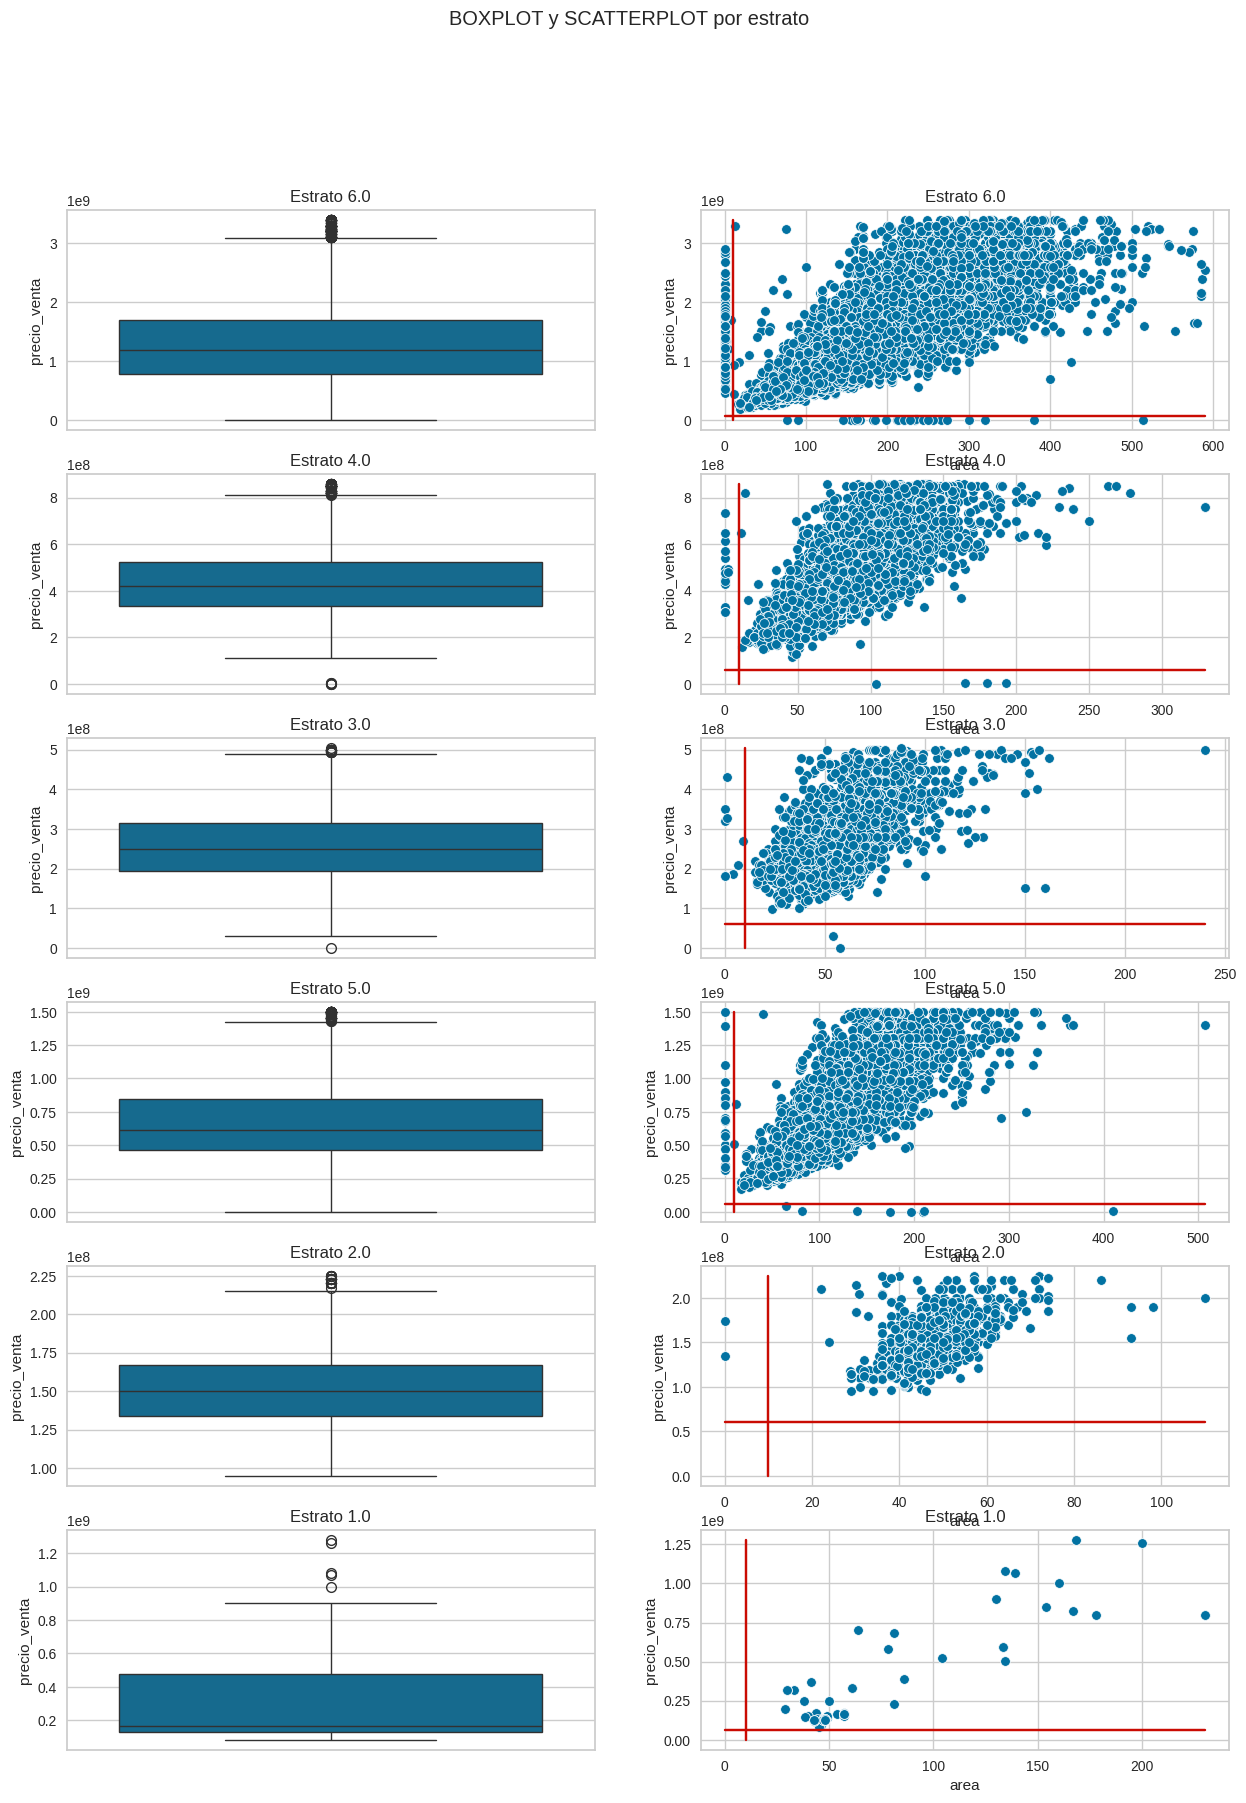

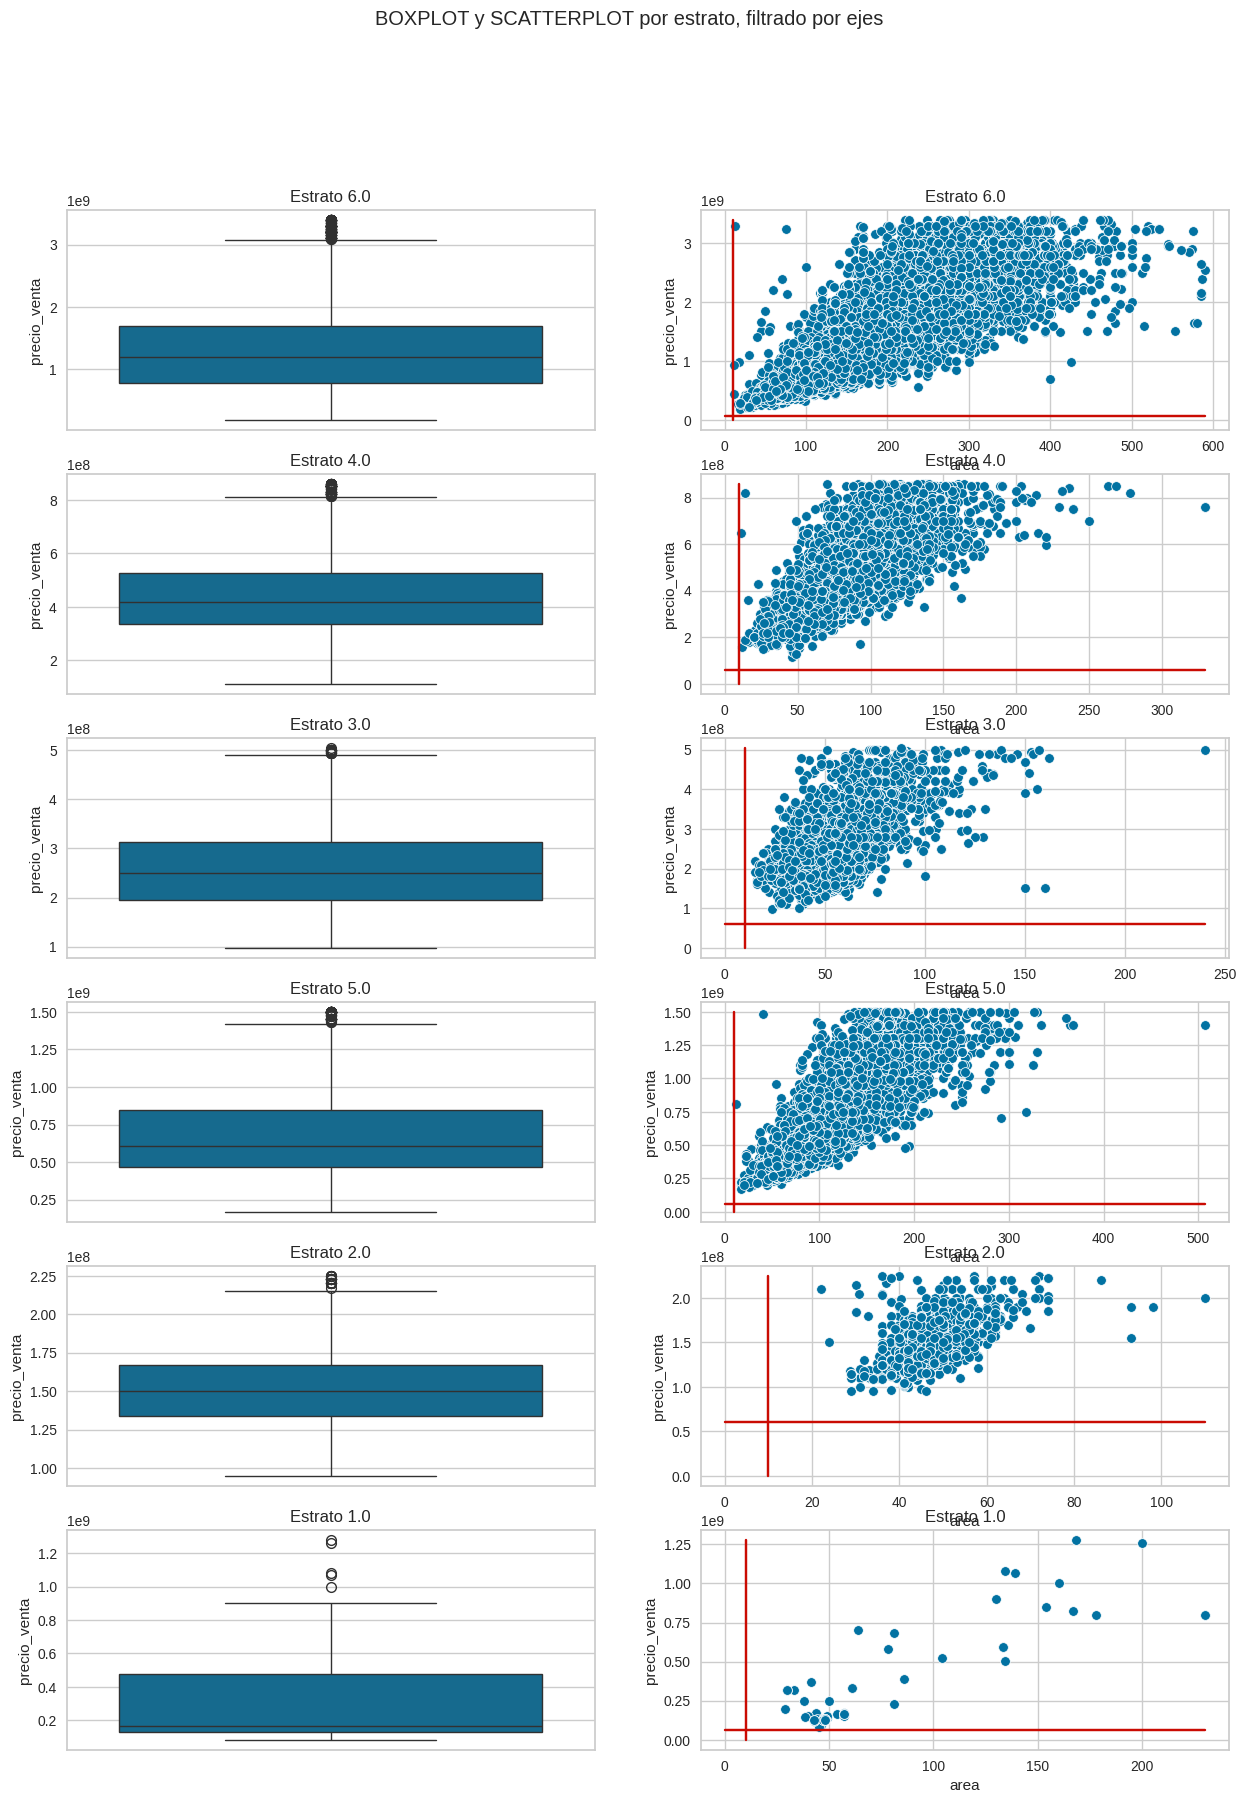

In [ ]:
# deleting instances with area > 600
filtered_data = df[df["area"] < 600]

# plotting the boxplots and scatter plots of new filtered data

filtered_data2 = pd.DataFrame()
validation_data = pd.DataFrame()
fig1, ax1 = plt.subplots(len(filtered_data["estrato"].unique()),2 , figsize=(15, 20))
fig2, ax2 = plt.subplots(len(filtered_data["estrato"].unique()),2 , figsize=(15, 20))
for i, estrato in enumerate(filtered_data["estrato"].unique()):
  estrato_data = filtered_data[filtered_data["estrato"] == estrato]
  Q3 = estrato_data["precio_venta"].quantile(0.75)
  Q1 = estrato_data["precio_venta"].quantile(0.25)
  IQR = Q3 - Q1
  upper_bound = Q3 + 1.5 * IQR
  lower_bound = Q1 - 1.5 * IQR
  #Removing data over upper_bound in precio_venta by "estrato"
  estrato_data = estrato_data[(estrato_data["precio_venta"] <= upper_bound)]

  # Ploting boxplot _precio de venta by estrato
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax1[i,0])
  ax1[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax1[i,1])
  # Drawing lines in 60e6 and area 10 to delimiting precio_venta by estrato
  max_area_estrato = estrato_data["area"].max()
  max_precio_estrato = estrato_data["precio_venta"].max()
  ax1[i,1].plot([0,max_area_estrato], [60e6, 60e6], color="r")
  ax1[i,1].plot([10,10], [0, max_precio_estrato], color="r")
  ax1[i,1].set_title(f"Estrato {estrato}")
  fig1.suptitle("BOXPLOT y SCATTERPLOT por estrato")

  # Removing instances with  precio venta < 60e6 from principal dataset
  # and adding them to validation data
  validation_data = pd.concat([validation_data, estrato_data[estrato_data["precio_venta"] < 60e6]])
  estrato_data = estrato_data[estrato_data["precio_venta"] > 60e6]
  estrato_data = estrato_data[estrato_data["area"] > 10]

  filtered_data2 = pd.concat([filtered_data2, estrato_data])
  sns.boxplot(data = estrato_data["precio_venta"], ax = ax2[i,0])
  ax2[i,0].set_title(f"Estrato {estrato}")
  sns.scatterplot(data = estrato_data, x = "area", y = "precio_venta", ax = ax2[i,1])
  max_area_estrato = estrato_data["area"].max()
  max_precio_estrato = estrato_data["precio_venta"].max()
  ax2[i,1].plot([0,max_area_estrato], [60e6, 60e6], color="r")
  ax2[i,1].plot([10,10], [0, max_precio_estrato], color="r")
  ax2[i,1].set_title(f"Estrato {estrato}")
  fig2.suptitle("BOXPLOT y SCATTERPLOT por estrato, filtrado por ejes")

1️⃣ Elimination of properties with area greater than 600 m² 🚫
✔ Records with area above 600 m² are removed.

2️⃣ Analysis of outliers in sale price 📉
✔ For each stratum, the interquartile range (IQR) is calculated:
Q1 (25th percentile), Q3 (75th percentile), IQR = Q3 - Q1
✔ Values above the upper limit (Q3 + 1.5 * IQR) are removed.

3️⃣ Visualization with Boxplots and Scatterplots 📊
🔹 Two charts are created per stratum to facilitate comparison:
📌 First set of charts (fig1)
📍 Boxplot of sale price by stratum
📍 Scatterplot (Area vs Sale Price)
✔ Reference lines are added at:
₦60 million (minimum accepted price value)
10 m² (minimum area size)

4️⃣ Filtering properties by price and area 🏗
✔ Properties with sale price < ₦60 million are removed and stored in validation_data for later analysis.
✔ Properties with area ≤ 10 m² are removed.
✔ The filtered dataset is saved in filtered_data2.

5️⃣ Visualization of the final filtered dataset 📊
🔹 A second set of charts (fig2) is generated with the cleaned data:
📍 Boxplot of the filtered sale price
📍 Scatterplot (Area vs Sale Price), with corrected limits
✔ Reference lines are kept to facilitate comparison with the unfiltered data.

🎯 Conclusions:

✅ Removal of outliers in price and area to avoid biases in the analysis.

✅ Identification of trends between area and sale price across different strata.

✅ Creation of a cleaner and more representative dataset for the predictive model.

📌 Boxplots are generated for all numerical variables in the filtered_data2 dataset to analyze the data distribution, identifying possible outliers in each column.

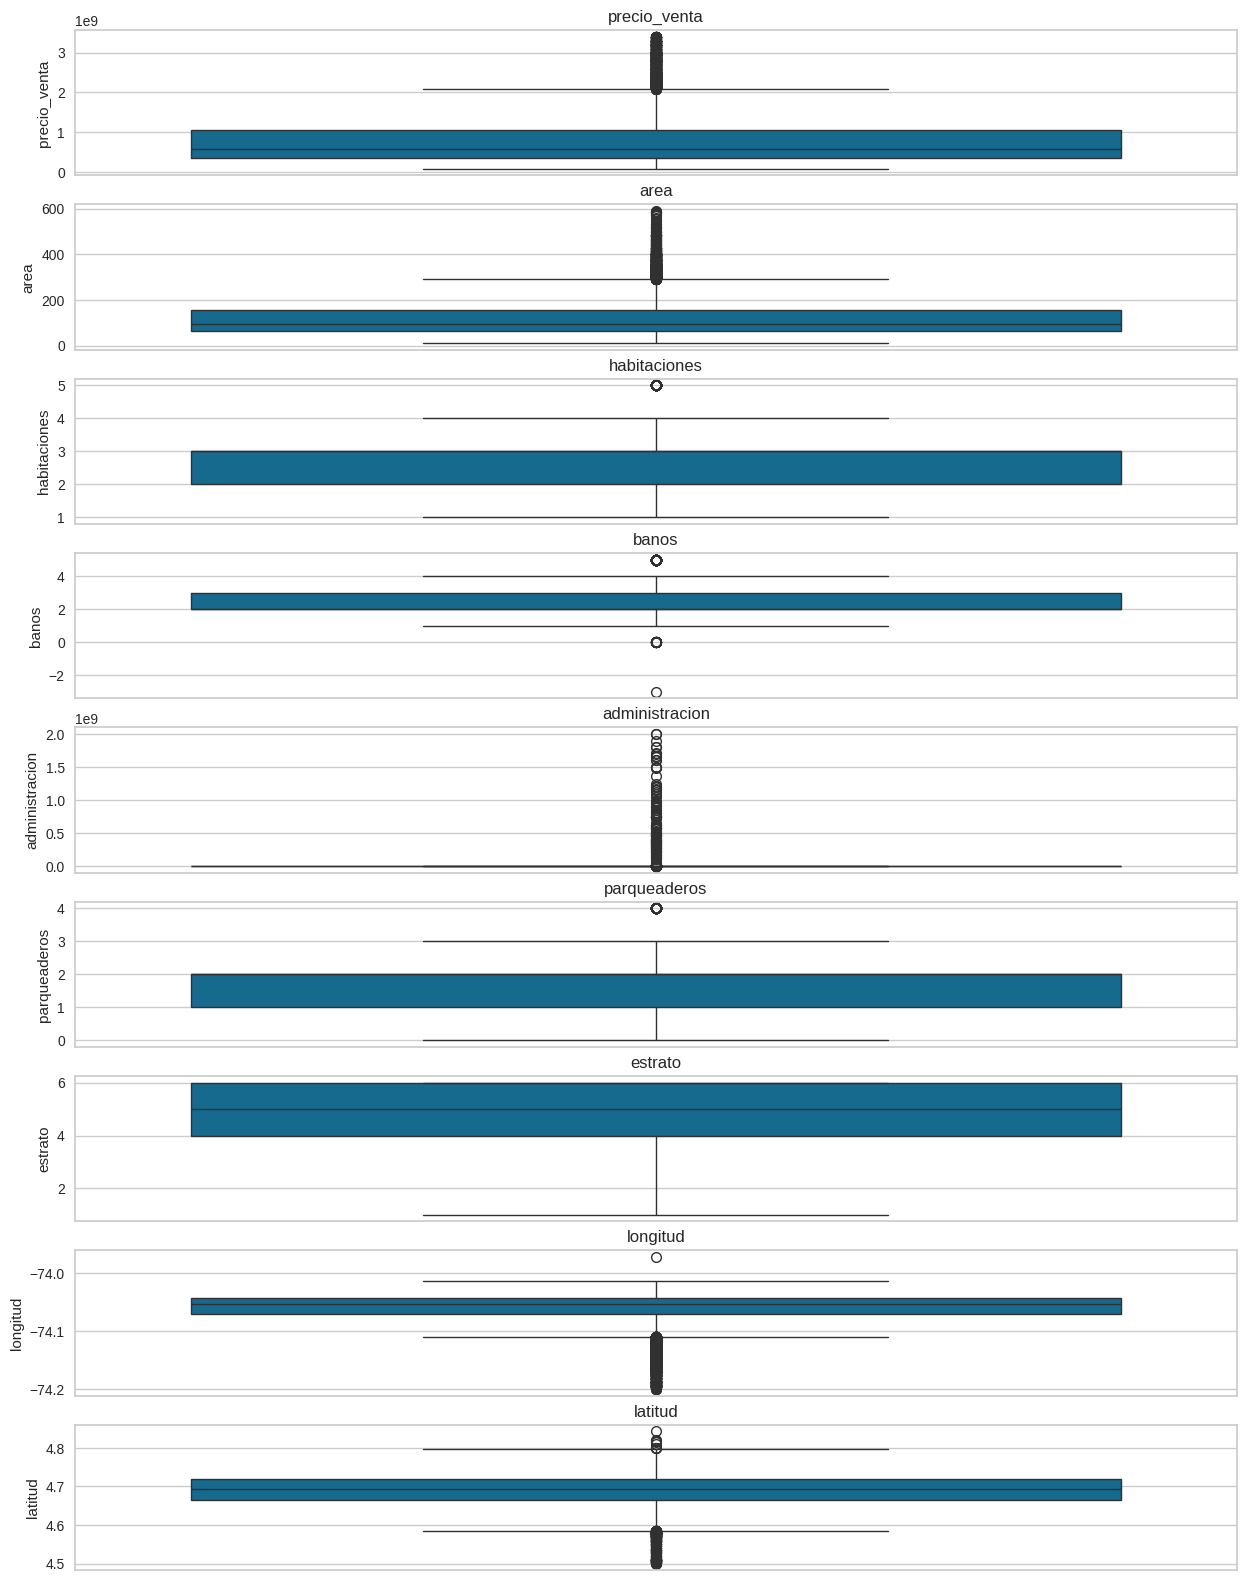

In [ ]:
numeric_columns = filtered_data2.select_dtypes(include=[np.number]).columns
fig, ax = plt.subplots(len(numeric_columns) , figsize=(15, 20))
for i, column in enumerate(numeric_columns):
  sns.boxplot(data= filtered_data2[column], ax = ax[i])
  ax[i].set_title(f"{column}")

📌 Extreme values in the administration column are filtered using the Interquartile Range (IQR) method to improve data quality and avoid biases in subsequent analyses.

In [ ]:
# Remove upper outliers in Administracion
Q3 = filtered_data2["administracion"].quantile(0.75)
Q1 = filtered_data2["administracion"].quantile(0.25)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
filtered_data2 = filtered_data2[(filtered_data2["administracion"] <= upper_bound)]

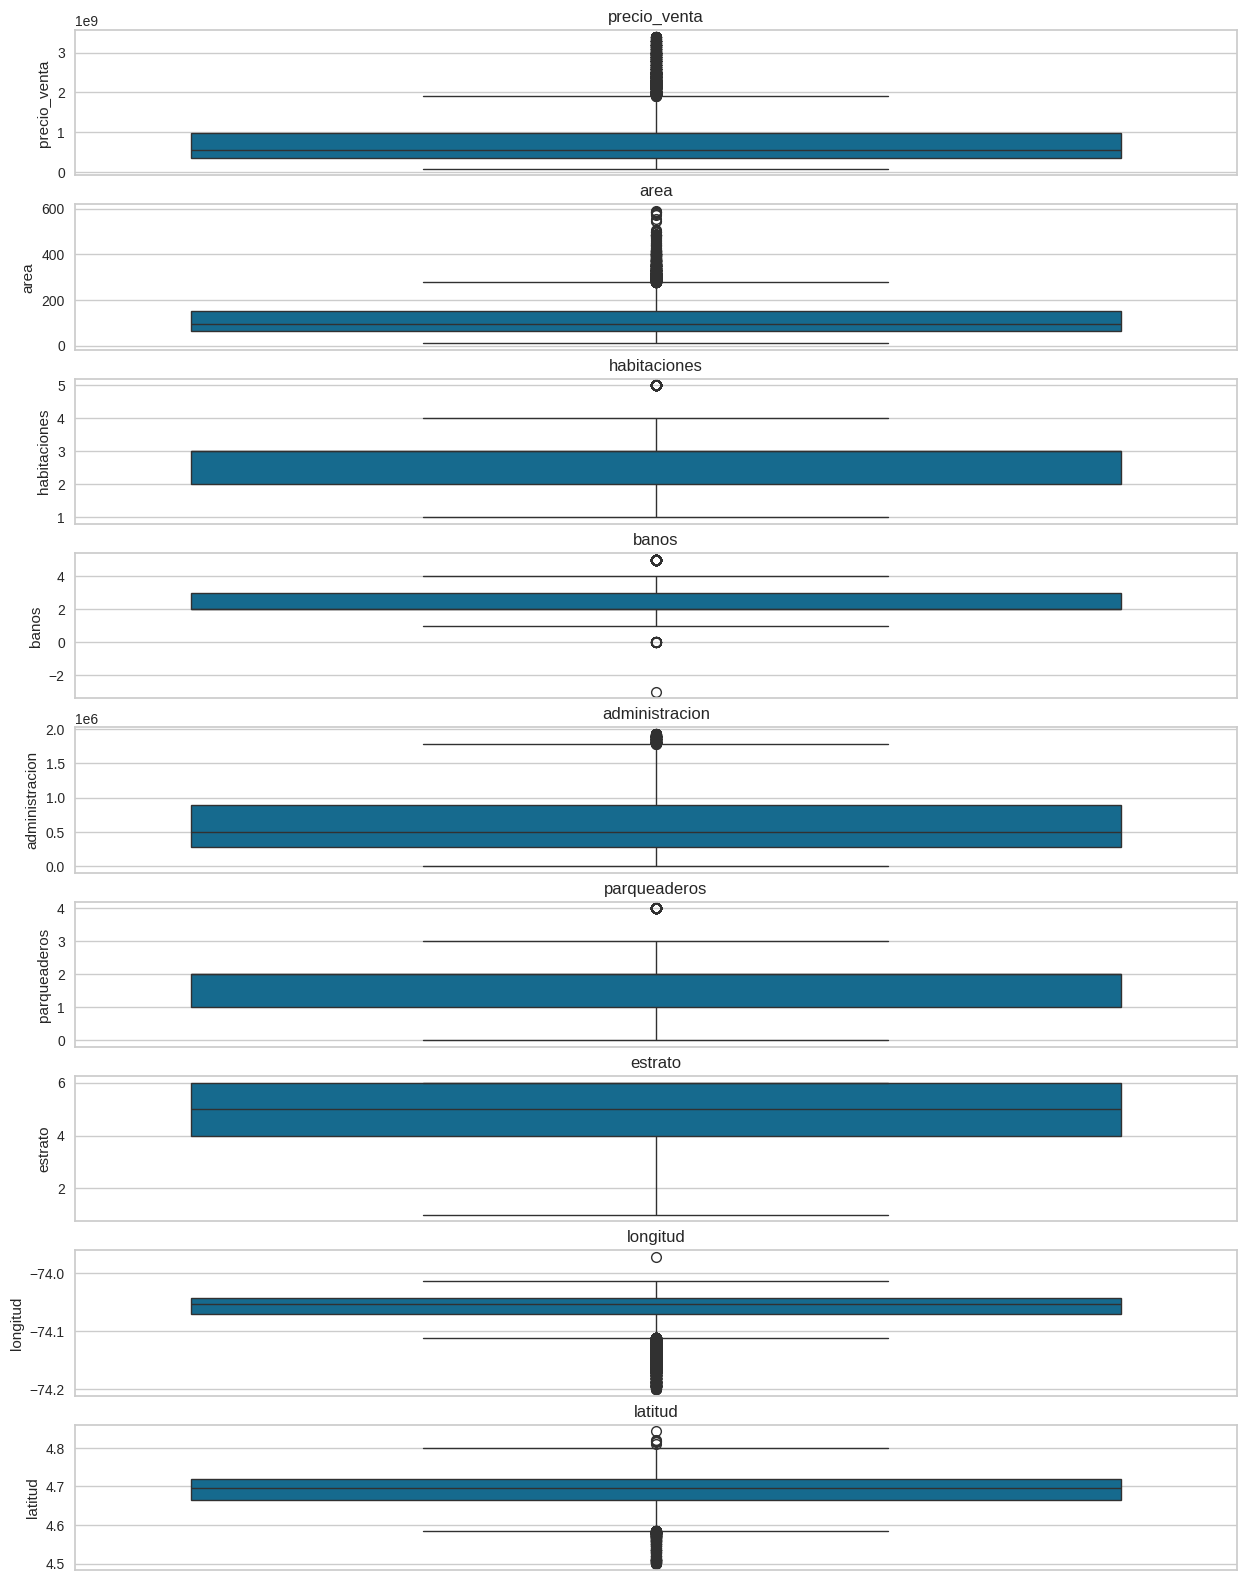

In [ ]:
fig, ax = plt.subplots(len(numeric_columns) , figsize=(15, 20))
for i, column in enumerate(numeric_columns):
  sns.boxplot(data= filtered_data2[column], ax = ax[i])
  ax[i].set_title(f"{column}")

📌 The categorical variables "sector" and "antiguedad" are transformed into numerical values for use in Machine Learning models. Encoding with LabelEncoder.

In [ ]:
# enconding sector feature and antiguedad
encoded_data = filtered_data2.copy()
label_encoder = LabelEncoder()
encoded_data["sector"] = label_encoder.fit_transform(encoded_data["sector"])
encoded_data["antiguedad"] = label_encoder.fit_transform(encoded_data["antiguedad"])

📌 Visualize the relationship between the numerical variables in the dataset using a heatmap.

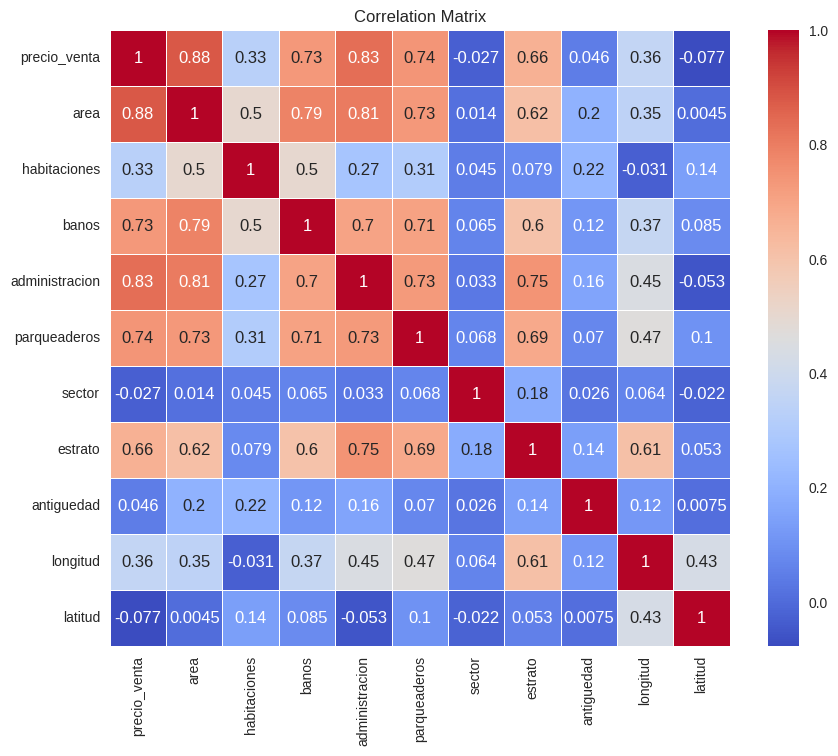

In [ ]:
# printinf a correlation matrix of numeric values
numeric_columns = encoded_data.select_dtypes(include=[np.number]).columns
correlation_matrix = encoded_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
filtered_data2.isna().sum()

,0
precio_venta,0
area,0
habitaciones,0
banos,0
administracion,0
parqueaderos,0
sector,0
estrato,0
antiguedad,0
longitud,0


# **Revisar desde acá: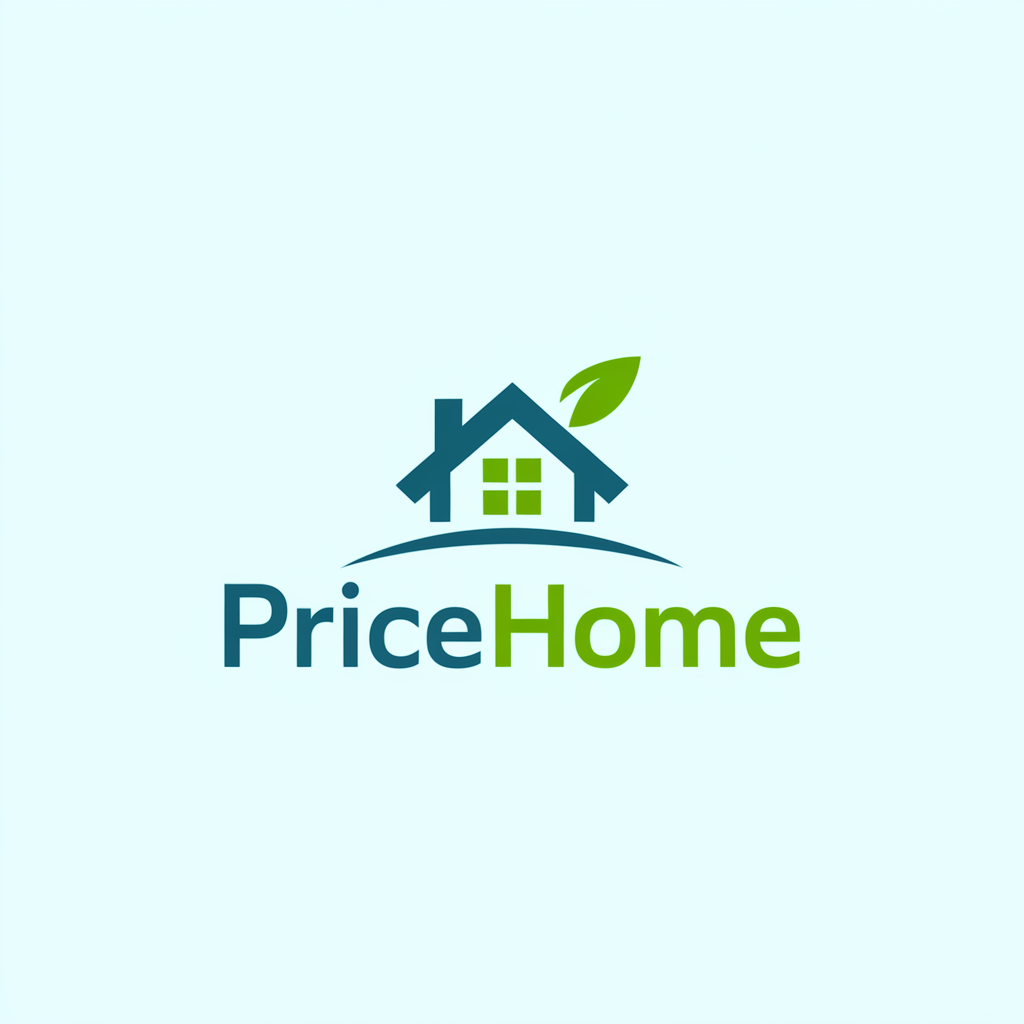**


In [ ]:
print(df['area'].unique())

[320.    84.   248.   ... 100.87  89.82  69.37]


# 4.Model Training:

**E1: Linear Regression**

***E1.1  Linear Regression ***

📌 The data is split into training and test sets to train a model that predicts the sale price of properties.

In [ ]:

# Now lets proceed with the preprocessing
# Get numeric Features
numeric_features = X_train.select_dtypes(include= np.number).columns.tolist()

# Get categorical Features
categorical_features = X_train.select_dtypes(include= "category").columns.tolist()

# Scale numeric features
import pickle
scaler_numeric = StandardScaler()
X_train[numeric_features] = scaler_numeric.fit_transform(X_train[numeric_features])

with open('scaler_numeric.pkl', 'wb') as file:
    pickle.dump(scaler_numeric, file)
# Encode the categorical value
X_train[categorical_features] = cat_encoder.transform(X_train[categorical_features])

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41835 entries, 1 to 66752
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   precio_venta    41835 non-null  float64 
 1   area            41835 non-null  float64 
 2   habitaciones    41835 non-null  float64 
 3   banos           41835 non-null  float64 
 4   administracion  41835 non-null  float64 
 5   parqueaderos    41835 non-null  float64 
 6   sector          41835 non-null  category
 7   estrato         41835 non-null  float64 
 8   antiguedad      41835 non-null  category
 9   longitud        41835 non-null  float64 
 10  latitud         41835 non-null  float64 
dtypes: category(2), float64(9)
memory usage: 3.3 MB


📌 Standardize and encode the variables so that the model can process them correctly.

In [ ]:

# Now lets proceed with the preprocessing
# Get numeric Features
numeric_features = X_train.select_dtypes(include= np.number).columns.tolist()

# Get categorical Features
categorical_features = X_train.select_dtypes(include= "category").columns.tolist()

# Scale numeric features
import pickle
scaler_numeric = StandardScaler()
X_train[numeric_features] = scaler_numeric.fit_transform(X_train[numeric_features])

with open('scaler_numeric.pkl', 'wb') as file:
    pickle.dump(scaler_numeric, file)
# Encode the categorical value
X_train[categorical_features] = cat_encoder.transform(X_train[categorical_features])

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8367 entries, 3014 to 8868
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   area            8367 non-null   float64 
 1   habitaciones    8367 non-null   float64 
 2   banos           8367 non-null   float64 
 3   administracion  8367 non-null   float64 
 4   parqueaderos    8367 non-null   float64 
 5   sector          8367 non-null   category
 6   estrato         8367 non-null   float64 
 7   antiguedad      8367 non-null   category
 8   longitud        8367 non-null   float64 
 9   latitud         8367 non-null   float64 
dtypes: category(2), float64(8)
memory usage: 609.7 KB


📌 Ensure that the test (X_test) and validation (X_val) data have the same format as the training data (X_train).

In [ ]:
X_test[numeric_features] = scaler_numeric.transform(X_test[numeric_features])
X_test[categorical_features] = cat_encoder.transform(X_test[categorical_features])

X_val = validation_data.drop(columns= ["precio_venta"])
X_val[numeric_features] = scaler_numeric.transform(X_val[numeric_features])
X_val[categorical_features] = cat_encoder.transform(X_val[categorical_features])

📌 This function, train_val(), calculates and returns the key performance metrics of a regression model for the training and test sets.

In [ ]:
# Display the size of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (33468, 10)
X_test shape: (8367, 10)
Y_train shape: (33468,)
Y_test shape: (8367,)


📌 Linear Regression with Scikit-Learn.

In [ ]:
#I use the SKLearn library to call the specific algorithm that helps us apply regressions.
from sklearn.linear_model import LinearRegression
model_simple_lin_reg = LinearRegression()

📌 Linear Regression Training

In [ ]:
model_simple_lin_reg.fit(X_train, Y_train)

LinearRegression()

📌 Evaluate the performance of Linear Regression.

In [ ]:
Y_train_pred = model_simple_lin_reg.predict(X_train) # Datos conocidos
Y_test_pred = model_simple_lin_reg.predict(X_test) # Datos no conocidos

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model:str):

    scores = {
    model+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    model+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'linear')
slr_score

,linear_train,linear_test
R2,8.538921e-01,8.523801e-01
mae,1.422568e+08,1.447698e+08
mse,4.830301e+16,5.057837e+16
rmse,2.197795e+08,2.248964e+08


🔹 R² on test: 0.8523 → The model explains 85.23% of the variability in sale prices.

🔹 MAE: 144.77 million → High average error in the prediction.

🔹 MSE: 5.05 × 10¹⁶ → High squared error, suggesting issues with extreme values.

🔹 RMSE: 224.89 million → High average error, affecting precision.

🔍 Conclusion: The linear regression model has a good fit (85.23% R²), but shows high errors, indicating that the relationship between the variables is not purely linear. It can be useful as a reference, but more complex models are likely to perform better.

**E2: RANDOM FOREST**

In [ ]:
#Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
#Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the same data as the linear regression
rf_model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)

In [ ]:
#Evaluate
train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'Random F')

,Random F_train,Random F_test
R2,9.906401e-01,9.346935e-01
mae,2.909567e+07,7.834887e+07
mse,3.094378e+15,2.237567e+16
rmse,5.562713e+07,1.495850e+08


🔹 R² on test: 0.9346 → Explains 93.46% of the variability in sale prices, the best so far.

🔹 MAE: 78.34 million → Better than previous models.

🔹 MSE: 2.23 × 10¹⁶ → Lower mean squared error compared to other models.

🔹 RMSE: 149.58 million → Lower prediction error compared to linear regression and decision tree.

🔍 Conclusion: Random Forest is the best model so far, with the highest R² (93.46%) and the lowest errors. Its ability to reduce variance and better handle outliers makes it a solid choice. However, there is still room for improvement, for example, by tuning hyperparameters like n_estimators, max_depth, and min_samples_split to optimize performance.

**E3: DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor # For regression

#Create the Decision Tree model
tree = DecisionTreeRegressor(random_state=42)

# Train the model
tree.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
Y_train_pred = tree.predict(X_train)
Y_test_pred = tree.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'Decision T')



,Decision T_train,Decision T_test
R2,9.999462e-01,8.767275e-01
mae,4.195121e+05,9.916114e+07
mse,1.778669e+13,4.223633e+16
rmse,4.217427e+06,2.055148e+08


🔹 R² on test: 0.8767 → Explains 87.67% of the variability in sale prices.

🔹 MAE: 99.16 million → An improvement over linear regression but still high.

🔹 MSE: 4.22 × 10¹⁶ → Still a significant error.

🔹 RMSE: 205.51 million → High error, indicating struggles with extreme values.

🔍 Conclusion: The Decision Tree shows significant overfitting, with an almost perfect R² in training but lower in testing. While it slightly improves over linear regression, it struggles with generalization. Reducing tree depth or trying more advanced models (such as Random Forest)

**E4: KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
# Train the model with the training data
knn.fit(X_train, Y_train)

# Predict the labels for the test data
Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'KNN-5')


,KNN-5_train,KNN-5_test
R2,9.999460e-01,9.137526e-01
mae,4.182789e+05,8.861940e+07
mse,1.785845e+13,2.955058e+16
rmse,4.225926e+06,1.719028e+08



🔹 R² on test: 0.9137 → Explains 91.37% of the variability in sale prices.

🔹 MAE: 88.61 million → Better than linear regression and decision tree, but worse than Random Forest.

🔹 MSE: 2.95 × 10¹⁶ → High mean squared error, though lower than other models.

🔹 RMSE: 171.90 million → Lower than linear regression and decision tree, but still significant.

🔍 Conclusion: The KNN model achieves a good fit with an R² of 91.37%, but it can be sensitive to the choice of k. While it improves accuracy compared to other models, its performance heavily depends on the data structure and could benefit from hyperparameter tuning.

**E5: XGBRegressor**

In [ ]:
from xgboost import XGBRegressor

#Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, Y_train)

# Make predictions
Y_train_pred = xgb_model.predict(X_train)
Y_test_pred = xgb_model.predict(X_test)

# Evaluate the model using error metrics
train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'xgboost')

,xgboost_train,xgboost_test
R2,9.421997e-01,9.276171e-01
mae,8.485961e+07,9.369073e+07
mse,1.910869e+16,2.480023e+16
rmse,1.382342e+08,1.574809e+08


🔹 R² on test: 0.9276 → Explains 92.76% of the variability in sale prices, approaching Random Forest.

🔹 MAE: 93.69 million → Similar to KNN but worse than Random Forest.

🔹 MSE: 2.48 × 10¹⁶ → Lower than linear regression but higher than Random Forest.

🔹 RMSE: 157.48 million → Strong performance, though still higher than Random Forest.

🔍 Conclusion: XGBoost is one of the most robust models, with an R² of 92.76%, very close to Random Forest. It can be further optimized by tuning hyperparameters such as learning_rate, max_depth, and n_estimators. With proper adjustments, it could be a competitive option.

E6: NLP

In [ ]:
from sklearn.neural_network import MLPRegressor


regr = MLPRegressor(
                    hidden_layer_sizes=(100,100),
                    random_state=42, max_iter=6000,
                    tol=0.1, verbose= True,
                    learning_rate_init= 0.01,
                    learning_rate= 'adaptive'
                    )
regr.fit(X_train, Y_train)
regr.score(X_train, Y_train)

Iteration 1, loss = 450829915578794752.00000000
Iteration 2, loss = 429436444763528000.00000000
Iteration 3, loss = 353425224991288128.00000000
Iteration 4, loss = 257497583377617408.00000000
Iteration 5, loss = 210583608692724704.00000000
Iteration 6, loss = 198752092965138592.00000000
Iteration 7, loss = 191450993223483328.00000000
Iteration 8, loss = 183558555832666208.00000000
Iteration 9, loss = 174486874388732064.00000000
Iteration 10, loss = 163791520473667584.00000000
Iteration 11, loss = 151255044212832192.00000000
Iteration 12, loss = 136847055438171680.00000000
Iteration 13, loss = 121209703048852352.00000000
Iteration 14, loss = 105875200142205616.00000000
Iteration 15, loss = 92505162536895840.00000000
Iteration 16, loss = 82199326538572176.00000000
Iteration 17, loss = 74710398808115952.00000000
Iteration 18, loss = 68518636554341320.00000000
Iteration 19, loss = 62887864498441608.00000000
Iteration 20, loss = 58403505176922640.00000000
Iteration 21, loss = 55166404161325

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.8808349874080269

In [ ]:
Y_train_pred = regr.predict(X_train)
Y_test_pred = regr.predict(X_test)

train_val(Y_train, Y_train_pred, Y_test, Y_test_pred, 'MLP')


,MLP_train,MLP_test
R2,8.808350e-01,8.821120e-01
mae,1.182807e+08,1.201766e+08
mse,3.939575e+16,4.039146e+16
rmse,1.984836e+08,2.009763e+08


🔹 R² on test: 0.8821 → Explains 88.21% of the variability in sale prices.

🔹 MAE: 120.18 million → Worse than all other evaluated models.

🔹 MSE: 4.03 × 10¹⁶ → Higher mean squared error.

🔹 RMSE: 200.97 million → One of the highest errors.

🔍 Conclusion: The multilayer neural network has an acceptable performance with an R² of 88.21%, but it shows higher errors compared to Random Forest and XGBoost. It may require further adjustments in its architecture, number of layers, and learning rate to enhance its performance.


# 🚀 Final Model Comparison

| Model | R² (Test) | MAE (Millions) | RMSE (Millions) |
|--------|-----------|----------------|-----------------|
| Regresión Lineal | 85.23% | 144.77 | 224.89 |
| Árbol de Decisión | 87.67% | 99.16 | 205.51 |
| Random Forest | 93.46% | 78.34 | 149.58 |
| KNN (k=5) | 91.37% | 88.61 | 171.90 |
| XGBoost | 92.76% | 93.69 | 157.48 |
| Red Neuronal (MLP) | 88.21% | 120.18 | 200.97 |


➡️ General Conclusion:

🔹 Random Forest remains the best-performing model, with the highest R² (93.46%) and the lowest errors.

🔹 XGBoost is a strong alternative, showing similar performance with room for improvement through hyperparameter tuning.

🔹 KNN and Decision Tree perform decently, but they lag behind Random Forest and XGBoost.

🔹 Linear Regression and the Neural Network (MLP) have the worst errors and lower predictive power.

In [ ]:
import pickle

with open('randomForest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)